# Introduction

Computer vision is an exciting field of artificial intelligence that focuses on enabling machines to "see" and understand images. Image classification, a core task in computer vision, involves training models to recognize and categorize images. In this tutorial, we'll use TensorFlow and transfer learning to build an image classifier that identifies different types of flowers.

# Dataset

**Description:** The flower photos dataset consists of images of various flower species. We'll use a subset of this dataset.

*   **Source:** https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
*   **Image Size:** Images may have varying sizes, but we will resize them during preprocessing.
*   **File Type:** .jpg or .jpeg
*   **Number of Images:** Approximately 3700
*   **Classes:** The dataset contains five classes of flowers: daisy, dandelion, roses, sunflowers, and tulips.

# Model

**Architecture:** We'll use a pre-trained image classification model called
EfficientNetV2-S from TensorFlow Hub. EfficientNet models are known for their excellent performance and computational efficiency. Transfer learning allows us to leverage the knowledge of the pre-trained model and adapt it to our flower classification task.

**Input:** Resized and normalized color images (RGB) of flowers.

**Output:**  A probability distribution over the five flower classes.

# Training

## Preprocessing:
1. Load images: Import images from the dataset directory.
2. Resize images: Resize images to a consistent size (e.g., 224x224 pixels) to match the expected input size of the EfficientNetV2-S model.  
3. Normalization: Normalize the pixel values, typically to a range between 0 and 1, to help with model convergence.
4. Data augmentation (optional): Apply random transformations (rotations, flipping, color jitter) to increase dataset variability and prevent overfitting.


## Loss Function:
Categorical cross-entropy, a common choice for multi-class classification problems.

## Optimizer:
Adam, an adaptive optimizer often used in deep learning for its efficiency and robustness.

# Hyperparameters:

**Learning rate:** Controls the speed at which the model's weights are updated.

**Batch size:** The number of images processed in each training iteration.

**Epochs:** The number of times the model sees the entire dataset.

# Evaluation

## Metrics:
**Accuracy:** The percentage of correctly classified images.
Precision and Recall: Evaluate the model's ability to avoid false positives and false negatives, respectively (important if there's class imbalance).

**Confusion matrix:** Visualizes correct and incorrect predictions for each class, highlighting areas where the model might struggle.

In [3]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

In [4]:
# Load the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos', untar=True)

# Define image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Create training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

228813984/228813984 [==============================] - 3s 0us/step
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


# Intended Uses and Limitations

**Uses:** Our flower classifier could be integrated into apps that help identify flowers, educational tools, or image databases.

**Limitations:** The model's performance might be affected by image quality, background variations, underrepresentation of certain flower classes, or the limited size of the training dataset. Consider ways to improve generalization, such as expanding the dataset and using more robust data augmentation techniques.

# Further Steps

**Data Augmentation:**  The data_augmentation layer introduces random transformations to diversify our training data and help the model generalize better.

**Preprocessing:** The preprocess_input layer normalizes the images, essential for most image models.

**Model Creation:** We load the EfficientNetV2-S feature extractor from TensorFlow Hub and freeze its weights, utilizing the power of transfer learning.
We add a Dropout layer to prevent overfitting.
The final Dense layer has five output neurons corresponding to our five flower classes and uses a 'softmax' activation.
Compilation: We use the 'adam' optimizer, categorical cross-entropy loss, and track accuracy.

**Training:**  We train the model over 5 epochs (adjust this as needed).

**Evaluation:** We evaluate the final model on the validation set and print out the accuracy.

In [6]:
# Data Augmentation (optional)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
])

# Preprocessing with normalization
preprocess_input = tf.keras.layers.Rescaling(1. / 255)

# Model Creation with Transfer Learning
model_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2"
feature_extractor = hub.KerasLayer(model_url, trainable=False)  # Freeze the pre-trained layers
model = tf.keras.Sequential([
    preprocess_input,
    feature_extractor,
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 output classes for our flowers
])

model.build((None, *IMAGE_SIZE, 3))
model.summary()

# Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
epochs = 5
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)

# Evaluation
loss, accuracy = model.evaluate(val_ds)
print('Test Accuracy:', accuracy)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              20331360  
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 20337765 (77.58 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 20331360 (77.56 MB)
_________________________________________________________________
Epoch 1/5
92/92 [==============================] - 653s 7s/step - loss: 0.7464 - accuracy: 0.7507 - val_loss: 0.4561 - val_accuracy: 0.8460
Ep

# Visualization Plots

**Import Matplotlib:** We import the matplotlib.pyplot module for plotting.

**Extract History:**  We access the training history from the history object returned by the model.fit() method.

**Loss Plot:**

We plot both training and validation loss curves against the epochs.
We use blue circles ('bo') for training loss and a solid blue line ('b') for validation loss.
Labels, title, and a legend are added.

**Accuracy Plot:**

Similar to the loss plot, we visualize the training and validation accuracy over epochs, this time using green markers ('go', 'g').
Interpreting the Plots

## **Overfitting/Underfitting:**

If the validation loss starts increasing while training loss continues to decrease, it might signal overfitting.
If both training and validation loss remain high, the model might be underfitting.
Adjusting Training Procedure: These plots help guide decisions on whether to train for more epochs, adjust the learning rate, or modify the model architecture.

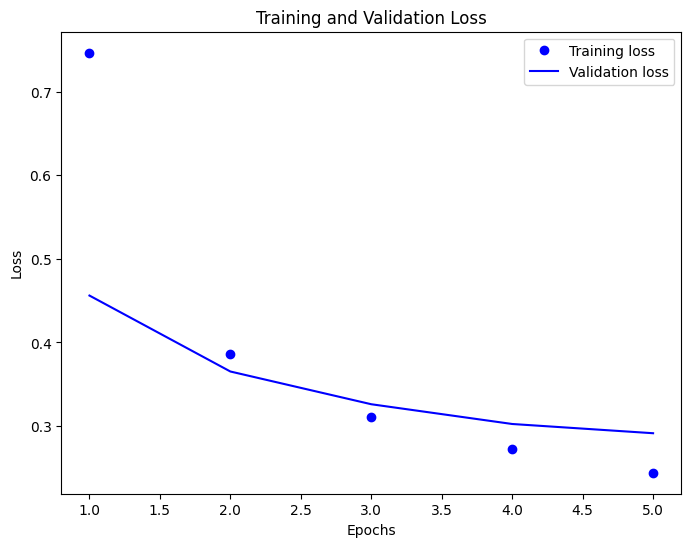

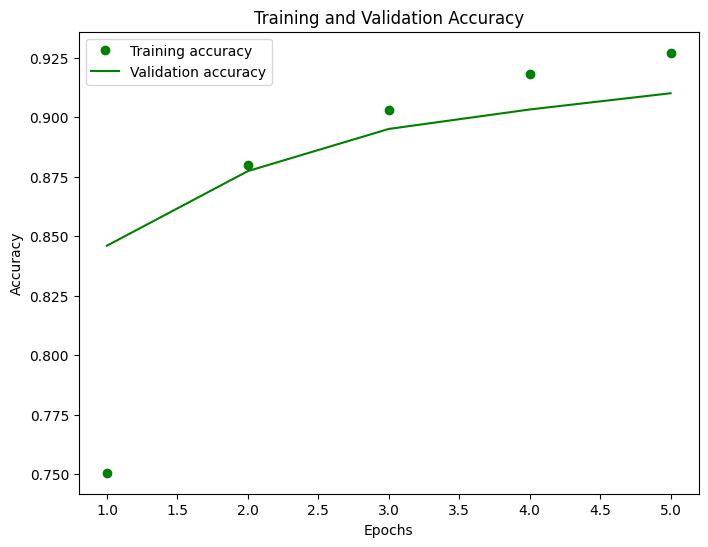

In [7]:
# Visualize Training Progress
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# Loss Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()